# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
list1 = a[3:]

# reverse the list
list1.reverse()

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
list(map(lambda num: num ** 2, a))

[1, 4, 9, 16, 25, 36]

In [3]:
# create a numpy array from this list
b = np.array(a)
b

array([1, 2, 3, 4, 5, 6])

In [4]:
# find the mean of b
b.mean()

3.5

In [5]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([ 1,  4,  9, 16, 25, 36])

In [6]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2, 3)
b

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
# find the mean value of each row
b[0].mean(), b[1].mean()

(2.0, 5.0)

In [8]:
# find the mean value of each column
b[:, 0].mean(), b[:, 1].mean(), b[:, 2].mean()

(2.5, 3.5, 4.5)

In [9]:
# find the third column of b
b[:, 2]

array([3, 6])

In [10]:
# load in the "starbucks_clean.csv" dataset
df = pd.read_csv("../data/starbucks_clean.csv")
df

,Unnamed: 0,beverage category,beverage,beverage prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,0,coffee,brewed coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,1,coffee,brewed coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,2,coffee,brewed coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,3,coffee,brewed coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0
4,4,classic espresso drinks,caffè latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,237,frappuccino blended crème,strawberries crème without whipped cream,Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6.0,8.0,20.0,10.0,0.0
238,238,frappuccino blended crème,vanilla bean without whipped cream,Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6.0,0.0,10.0,0.0,0.0
239,239,frappuccino blended crème,vanilla bean without whipped cream,Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6.0,0.0,10.0,0.0,0.0
240,240,frappuccino blended crème,vanilla bean without whipped cream,Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4.0,0.0,10.0,6.0,0.0


In [11]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
cal = df["calories"]
cal.mean()

193.87190082644628

In [12]:
# how many different categories of beverages are there?
unique_bev_cat = df["beverage category"].unique()
len(unique_bev_cat)

9

In [13]:
# what is the average # calories for each beverage category?
for bev in unique_bev_cat:
    bev_inst = df[df["beverage category"] == bev]
    calories = bev_inst["calories"]
    print(bev, ":", calories.mean())

coffee : 4.25
classic espresso drinks : 140.17241379310346
signature espresso drinks : 250.0
tazo tea drinks : 177.30769230769232
shaken iced beverages : 114.44444444444444
smoothies : 282.22222222222223
frappuccino blended coffee : 276.94444444444446
frappuccino light blended coffee : 162.5
frappuccino blended crème : 233.07692307692307


In [14]:
# what beverage preparation includes the most sugar on average?                
max_sugar = 0
max_bev_prep = ""
for bev in df["beverage prep"].unique():
    bev_inst = df[df["beverage prep"] == bev]
    avg_sugar = bev_inst["sugars"].mean()
    if avg_sugar > max_sugar:
        max_sugar = avg_sugar
        max_bev_prep = bev

max_bev_prep, max_sugar

('Whole Milk', 55.6875)

In [15]:
# what is the average % daily value calcium content for each beverage?
for bev in df["beverage"].unique():
    bev_inst = df[df["beverage"] == bev]
    avg_calc = bev_inst["calcium"].mean()
    print(bev, ":", avg_calc)

brewed coffee : 0.5
caffè latte : 35.0
caffè mocha without whipped cream : 30.0
vanilla latte or other flavoured latte : 32.916666666666664
caffè americano : 1.5
cappuccino : 22.5
espresso : 0.0
skinny latte any flavour : 33.75
caramel macchiato : 28.333333333333332
white chocolate mocha without whipped cream : 41.25
hot chocolate without whipped cream : 35.0
caramel apple spice without whipped cream : 0.0
tazo tea : 0.0
tazo chai tea latte : 21.666666666666668
tazo green tea latte : 39.166666666666664
tazo fullleaf tea latte : 20.833333333333332
tazo fullleaf red tea latte vanilla rooibos : 20.833333333333332
iced brewed coffee with classic syrup : 0.0
iced brewed coffee with milk  classic syrup : 8.0
shaken iced tazo tea with classic syrup : 0.0
shaken iced tazo tea lemonade with classic syrup : 0.0
banana chocolate smoothie : 20.0
orange mango banana smoothie : 10.0
strawberry banana smoothie : 10.0
coffee : 12.333333333333334
mocha without whipped cream : 12.0
caramel without whipp

In [16]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay

# My plan: 
# find median protein of all drinks
# find median calories of all drinks
# for each drink: calculate p_diff = (protein - protein_med) / protein_med 
#                           (do same for calories)
# find drink with max (p_diff - c_diff)

p_med = df["protein"].median()
c_med = df["calories"].median()

max_diff = 0
max_index = -1
for i in df.index:
    p_diff = (df.iloc[i]["protein"] - p_med) / p_med
    c_diff = (df.iloc[i]["calories"] - c_med) / c_med
    if (p_diff - c_diff > max_diff):
        max_diff = p_diff - c_diff
        max_index = i
        
df.iloc[max_index]["beverage"], df.iloc[max_index]["protein"], df.iloc[max_index]["calories"]

('banana chocolate smoothie', 20.0, 280)

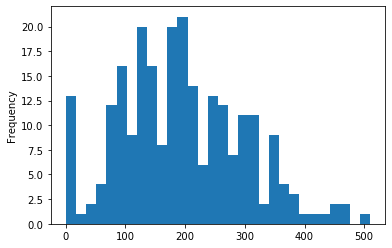

In [32]:
# plot the distribution of the number of calories in drinks using matplotlib

# distribution of num calories in ALL drinks?
df["calories"].plot.hist(bins=30)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


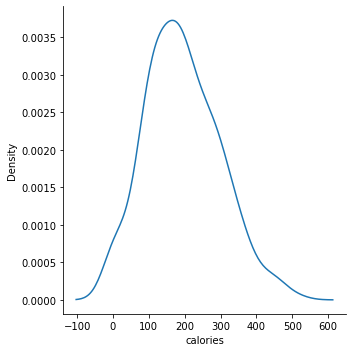

In [29]:
# plot the same distribution using seaborn. what about a density plot instead?
sns.displot(data=df, x="calories", kind="kde")

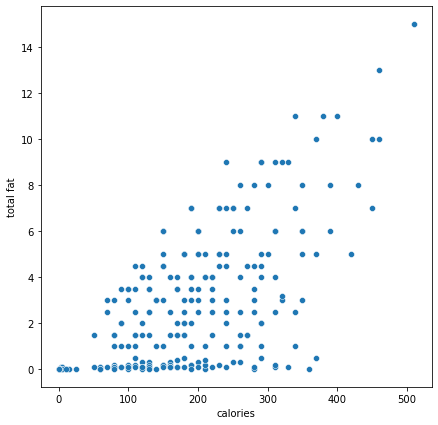

In [35]:
# plot calories against total fat using seaborn
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x="calories", y="total fat")

/home/melodiej/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/melodiej/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional

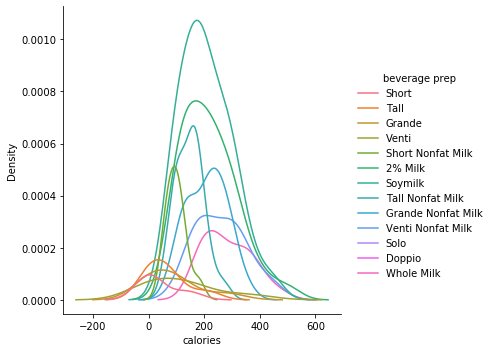

In [38]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

#df.groupby("beverage prep")["calories"].hist()
sns.displot(data=df, x="calories", kind="kde", hue="beverage prep")